# How to Determine if Linear Regression Models Data Well
## 1. x and y have a linear relationship.
### How to tell: Scatter plot looks like it follows a line
## 2. The residuals of the observations are independent of one another
### How to tell: if suspected time dependency, plot residuals against time.  They should look random.  Other dependencies work similarly
## 3. The mean of the residuals is 0 and the variance is constant
### How to tell: Plot residuals against predicted values. They should vary evenly about a horizontal line at y = 0
## 4. The residuals are normally distributed
### How to tell: Plot observed residuals against theoretical normal residuals. Plot 45 degree line. Points are close to line if normally distributed.This is done in both matplotlib and seaborn with a QQ plot (quantileXquantile)







In [1]:
#7.3.1

import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#read data
path = "/Users/depalma/Desktop/CPSC222/A-Data/"
file = "crab-groups.csv"
fin = path + file
crabs = pd.read_csv(fin)

#values extracts the values, but we need them as 2-D array (num values X number of features: rowsX1, where -1 says you figure out number of rows 
X = crabs[['latitude']].values.reshape(-1, 1)
y = crabs[['mean_mm']].values.reshape(-1, 1)

In [3]:
# Fit a least squares regression model
linModel = LinearRegression();
#Learn the best fitting line through the data by minimizing the sum of squares residuals.
linModel.fit(X, y)
#fit(X,y) gives us the slope and y-intercept
print("Slope (m):", linModel.coef_[0])
print("Intercept (b):", linModel.intercept_)



Slope (m): [0.48834592]
Intercept (b): [-3.70393483]


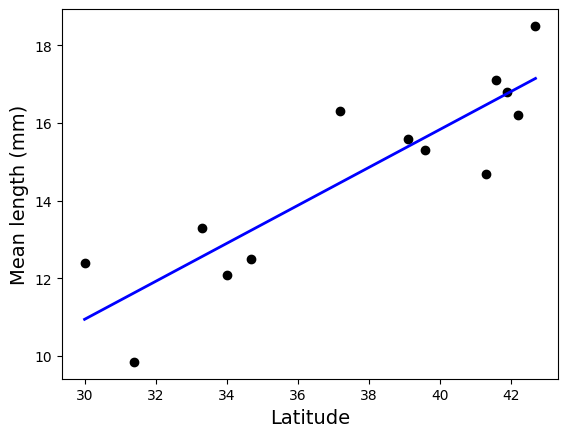

In [4]:

# Predict y-values along the fitted line and plot scatter points
y_pred = linModel.predict(X)
plt.scatter(X, y, color='black')

#plot the regression line.  
#sort the data, to make sure latitudes are in order
X_plot = np.sort(X,axis=0)
#re-predict based on sorted data
y_plot = linModel.predict(X_plot)

# Plot regression line (sorted by X for a clean line)
plt.plot(X_plot, y_plot,color='blue', linewidth=2)
# Label axes
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)
plt.show()


In [5]:
# Calculate predicted values and residuals
yResid = y_pred - y

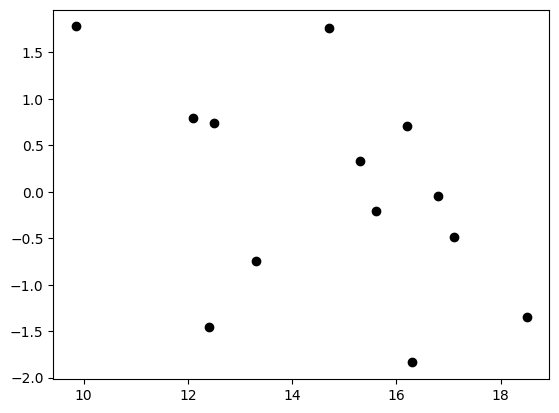

In [6]:
#scatter plot y predicted against y resid.  If the data is linear, this should appear random\
plt.scatter(y, yResid, color='black')

Text(0.5, 1.0, 'Fitted value vs. residual plot')

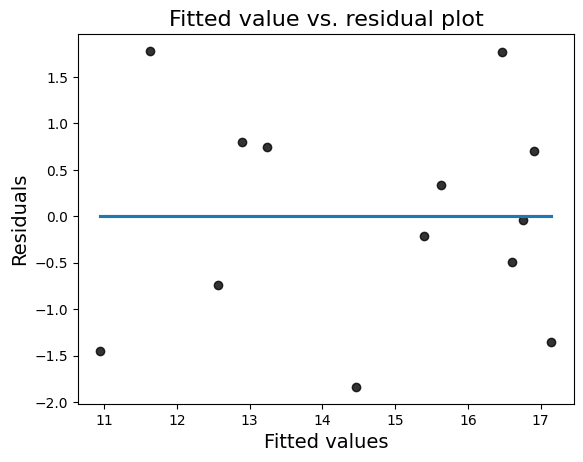

In [7]:

# Scatter plot with predicted values vs. residuals
# Points should be scattered around a horizontal line at y=0 with no obvious pattern
p = sns.regplot(x=y_pred, y=yResid, ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Fitted values', fontsize=14)
p.set_ylabel('Residuals', fontsize=14)
p.set_title('Fitted value vs. residual plot', fontsize=16)

Text(0, 0.5, 'Sample Quantiles')

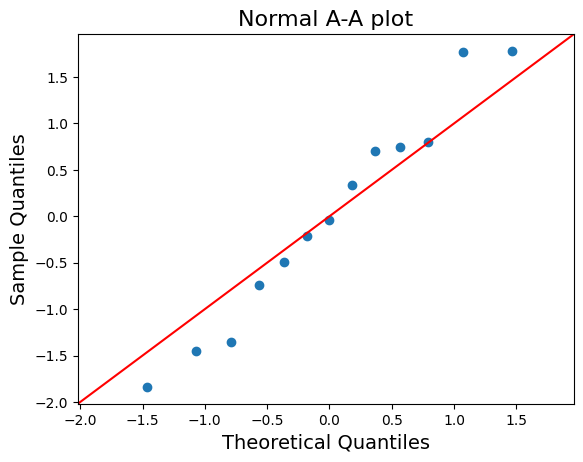

In [10]:
#flatten residuals
resid = np.ravel(yResid)
# use qqplot() from statsmodel to make a QQ plot
p = sm.qqplot(resid, line='45')
plt.title("Normal A-A plot", fontsize=16)
plt.xlabel("Theoretical Quantiles", fontsize = 14)
plt.ylabel("Sample Quantiles", fontsize=14)